# Implémentation avec equation de Lotka-Volterra

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Paramètres du modèle Lotka-Volterra

In [4]:
r = 0.1   # Taux de reproduction des proies (constant)
m = 0.1   # Taux de mortalité des proies (dû aux prédateurs rencontrés)
b = 0.01  # Taux de reproduction des prédateurs (dû aux proie consommée)
a = 0.02  # Taux de mortalité des prédateurs (constant)

### Equations diférentielles

In [5]:
def lotka_volterra(t, y):
    H, P = y  # H=pop proies, P=pop prédateurs
    dHdt = r*H - a*H*P # L'équation de la proie
    dPdt = b*H*P - m*P # L'équation du prédateur
    return [dHdt, dPdt]

### Conditions initiales

In [6]:
H0 = 40  # Population initiale des proies
P0 = 9   # Population initiale des prédateurs
y0 = [H0, P0]

### Conditions de simulations

In [7]:
t_span = (0, 200)                    # Simulation de 0 à 200 unités de temps
t_eval = np.linspace(*t_span, 1000)  # Points d'évaluation pour une résolution lisse

### Résolution des équations différencielles

In [8]:
solution = solve_ivp(lotka_volterra, t_span, y0, t_eval=t_eval, method='RK45')

### Point fixe

In [17]:
Hfixe = m / b
Pfixe = r / a

### Résultat

In [9]:
t = solution.t     # Temps
H, P = solution.y  # Populations des proies et prédateurs

### Courbes des populations

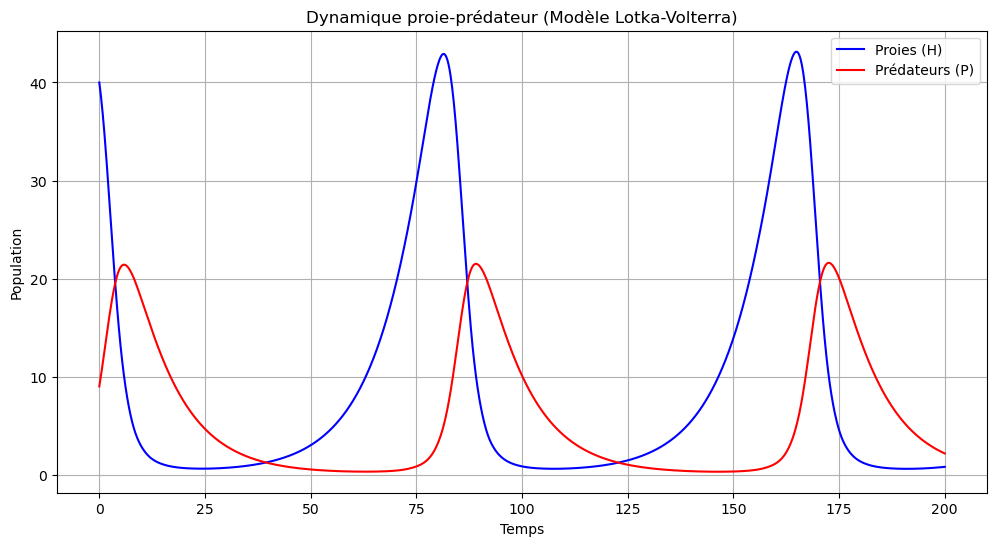

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(t, H, label="Proies (H)", color="blue")
plt.plot(t, P, label="Prédateurs (P)", color="red")
plt.title("Dynamique proie-prédateur (Modèle Lotka-Volterra)")
plt.xlabel("Temps")
plt.ylabel("Population")
plt.legend()
plt.grid()

### Diagramme de phase

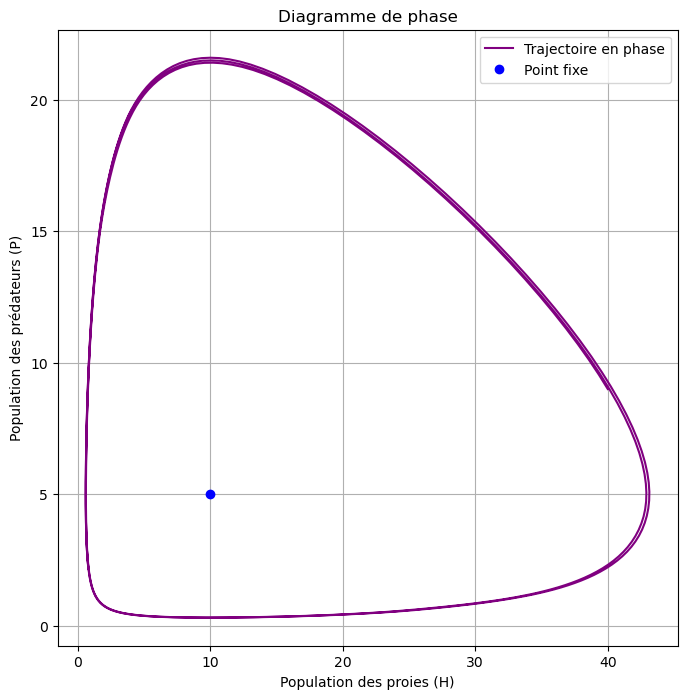

In [19]:
plt.figure(figsize=(8, 8))

plt.plot(H, P, label="Trajectoire en phase", color="purple")
plt.plot(Hfixe, Pfixe, 'o', label="Point fixe", color="blue")
plt.title("Diagramme de phase")
plt.xlabel("Population des proies (H)")
plt.ylabel("Population des prédateurs (P)")
plt.legend()
plt.grid()